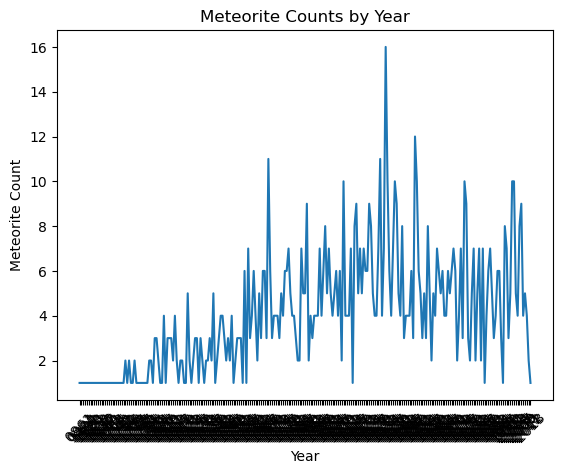

all the Earth meteorites that fell before the year 2000:
Aachen
Aarhus
Abee
Acapulco
Achiras
Adhi Kot
Adzhi-Bogdo (stone)
Agen
Aguada
Aguila Blanca
Aioun el Atrouss
Aïr
Aire-sur-la-Lys
Akaba
Akbarpur
Akwanga
Akyumak
Al Rais
Alais
Albareto
Alberta
Aldsworth
Aleppo
Alessandria
Alexandrovsky
Alfianello
Allegan
Allende
Alta'ameem
Ambapur Nagla
Andhara
Andover
Andreevka
Andura
Angers
Angra dos Reis (stone)
Ankober
Anlong
Aomori
Appley Bridge
Apt
Arbol Solo
Archie
Arroyo Aguiar
Asco
Ashdon
Assisi
Atarra
Atemajac
Athens
Atoka
Aubres
Aumale
Aumieres
Ausson
Avanhandava
Avce
Avilez
Awere
Aztec
Bachmut
Bahjoi
Bald Mountain
Baldwyn
Bali
Ban Rong Du
Bandong
Bansur
Banswal
Banten
Barbotan
Barcelona (stone)
Barea
Barnaul
Barntrup
Baroti
Barwell
Baszkówka
Bath
Bath Furnace
Bawku
Baxter
Beardsley
Beaver Creek
Beddgelert
Bells
Belville
Benares (a)
Benld
Benoni
Benton
Béréba
Berlanguillas
Bethlehem
Beuste
Beyrout
Bhagur
Bherai
Bhola
Bholghati
Bialystok
Bielokrynitschie
Bilanga
Binningup
Birni N'konni
Bis

In [1]:
import requests
import matplotlib.pyplot as plt

def download_meteorite_data(url):
    response = requests.get(url)
    data = response.json()
    return data

def filter_meteorites_before_year(data, year):
    filtered_data = [meteorite for meteorite in data if "year" in meteorite and int(meteorite["year"][:4]) < year]
    return filtered_data

def filter_meteorites_coordinates_before_year(data, year):
    filtered_data = [meteorite for meteorite in data if "year" in meteorite and int(meteorite["year"][:4]) < year and "reclat" in meteorite and "reclong" in meteorite]
    return filtered_data

def filter_meteorites_by_mass(data, mass_threshold):
    filtered_data = [meteorite for meteorite in data if "mass" in meteorite and float(meteorite["mass"]) / 1000 > mass_threshold]
    return filtered_data

def plot_meteorite_counts_by_year(data):
    year_counts = {}
    for meteorite in data:
        if "year" in meteorite:
            year = meteorite["year"][:4]
            year_counts[year] = year_counts.get(year, 0) + 1

    sorted_years = sorted(year_counts.keys())
    count_values = [year_counts[year] for year in sorted_years]

    plt.plot(sorted_years, count_values)
    plt.xlabel("Year")
    plt.ylabel("Meteorite Count")
    plt.title("Meteorite Counts by Year")
    plt.xticks(rotation=45)
    plt.show()

# Downloading the meteorite data
url = "https://data.nasa.gov/resource/y77d-th95.json"
meteorite_data = download_meteorite_data(url)

# ● Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = filter_meteorites_before_year(meteorite_data, 2000)

#● Get all the earth meteorites co-ordinates who fell before the year 1970
earth_meteorite_coordinates_before_1970 = filter_meteorites_coordinates_before_year(meteorite_data, 1970)

#● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg
earth_meteorites_mass_gt_10000kg = filter_meteorites_by_mass(meteorite_data, 10000)

# Plot meteorite counts by year
plot_meteorite_counts_by_year(meteorite_data)


print("all the Earth meteorites that fell before the year 2000:")
for meteorite in earth_meteorites_before_2000:
    print(meteorite.get("name", "Unknown"))

print("\nall the earth meteorites co-ordinates who fell before the year 1970:")
for meteorite in earth_meteorite_coordinates_before_1970:
    print(meteorite.get("reclat", "Unknown"), meteorite.get("reclong", "Unknown"))

print("\n all those whose mass was more than 10000kg:")
for meteorite in earth_meteorites_mass_gt_10000kg:
    print(meteorite.get("id", "Unknown"), meteorite.get("mass", "Unknown"))
